Text(0.5, 1.0, 'Correlation between Points and Average Description Length')

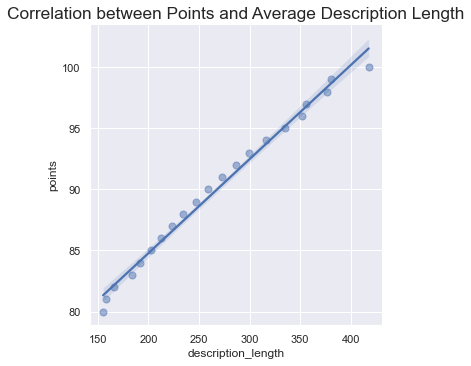

In [65]:
import pandas as pd
import numpy as np
import sqlite3 as sl
from database import db_constants
import matplotlib.pyplot as plt
import seaborn as sns
WINE_INIT_DB_NAME = db_constants.WINE_INIT_DB_NAME
WINE_INIT_PATH_TO_DB = 'database/' + WINE_INIT_DB_NAME
con = sl.connect(WINE_INIT_PATH_TO_DB)
sql_cmd = "SELECT * FROM wine_init"
df = pd.read_sql_query(sql_cmd, con, index_col = 'index')
df['description_length']=df['description'].str.len()
desciprtion=pd.DataFrame(df,columns=['description_length','points'])
#sns.lmplot(data=desciprtion,x="description_length",y="points")
df_PointsMeanLength = df.groupby("points").agg({'description_length':'mean'}).sort_values(by = 'description_length',ascending = False)
df_PointsMeanLength=df_PointsMeanLength.reset_index()
sns.lmplot(data=df_PointsMeanLength,x="description_length",y="points",scatter_kws={"s": 50, "alpha": .5})
plt.title("Correlation between Points and Average Description Length",fontsize='x-large')


Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64


<Figure size 1800x1200 with 0 Axes>

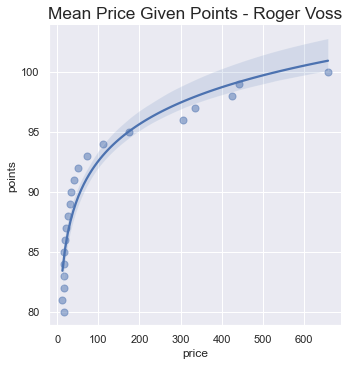

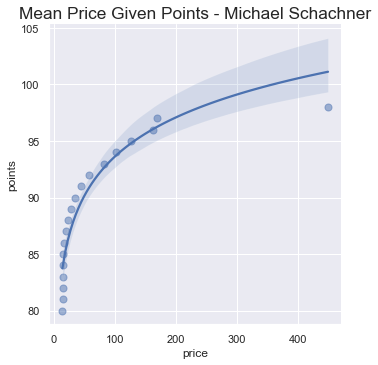

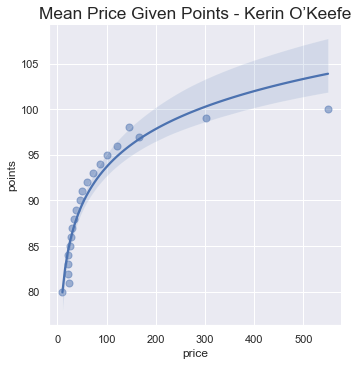

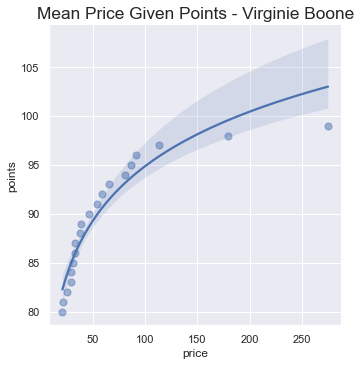

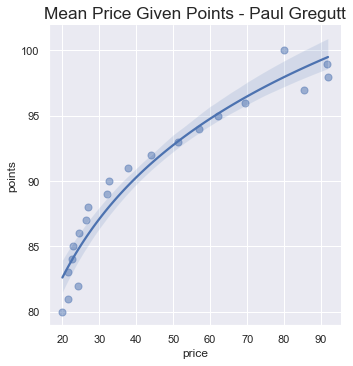

In [64]:
print(df["taster_name"].value_counts())
df_top5Taster = df[df["taster_name"].str.contains("Roger Voss|Michael Schachner|Kerin O’Keefe|Virginie Boone|Paul Gregutt")==True]
idx=0
f=plt.figure(dpi=300)
for taster in ["Roger Voss","Michael Schachner","Kerin O’Keefe","Virginie Boone","Paul Gregutt"]:
    df_taster=df_top5Taster[df_top5Taster["taster_name"]==taster]
    df_PointsMeanPrice=df_taster.groupby("points").agg({'price':'mean'}).sort_values(by = 'price',ascending = False)
    df_PointsMeanPrice=df_PointsMeanPrice.reset_index()
    sns.lmplot(data=df_PointsMeanPrice,x="price",y="points",scatter_kws={"s": 50, "alpha": .5},logx=True)
    plt.title("Mean Price Given Points - "+taster,fontsize='x-large')
    idx+=1
    

<Figure size 3000x2000 with 0 Axes>

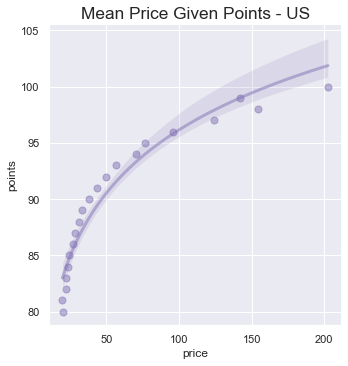

<Figure size 3000x2000 with 0 Axes>

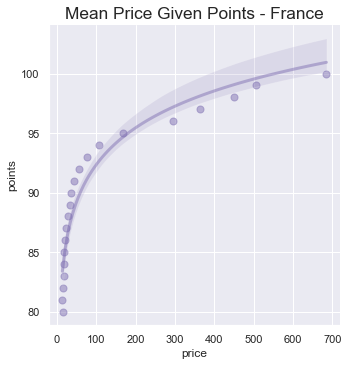

<Figure size 3000x2000 with 0 Axes>

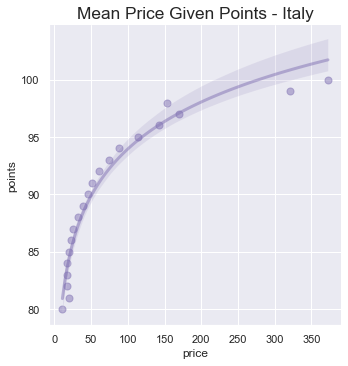

<Figure size 3000x2000 with 0 Axes>

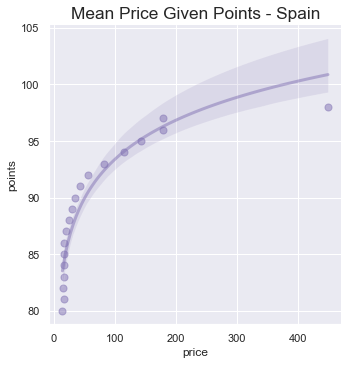

<Figure size 3000x2000 with 0 Axes>

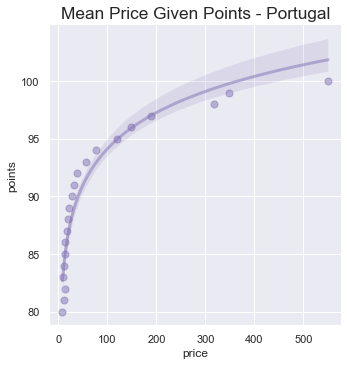

In [63]:
df_top5Country = df[df["country"].str.contains("US|France|Italy|Spain|Portugal")==True]
sns.set_theme(style="darkgrid")
idx=1
for country in ["US","France","Italy","Spain","Portugal"]:
    df_country=df_top5Country[df_top5Country['country']==country]    
    df_PointsMeanPrice = df_country.groupby("points").agg({'price':'mean'}).sort_values(by = 'price',ascending = False)
    df_PointsMeanPrice=df_PointsMeanPrice.reset_index()
    plt.figure(dpi=500)
    sns.lmplot(data=df_PointsMeanPrice,x="price",y="points",scatter_kws={"s": 50, "alpha": .5,"color":"m"},line_kws={"linewidth": 3, "alpha": .5,"color":"m"},logx=True)
    plt.title("Mean Price Given Points - "+country,fontsize='x-large')
    idx+=1
#con.close()